<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Convolutional Neural Network (CNN) Demonstration, CNN Classifier for CIFAR 10 

#### Honggeun Jo, Graduate Candidate, The University of Texas at Austin

##### [LinkedIn](https://www.linkedin.com/in/honggeun-jo/?originalSubdomain=kr) | [GitHub](https://github.com/whghdrms) | [Twitter](https://twitter.com/HonggeunJ)


#### Michael Pyrcz, Associate Professor, University of Texas at Austin 


##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)


### Workflow for training CNN to classify images

This workflow demonstrate training of a CNN model to classify CIFAR dataset.

* the CIFAR-10 dataset included 60,000 32x32 color images with 10 categories, including airplane, automobile, bird, cat etc.

* the images are mutually exclusive, without overlap of categories

* the iamges were compiled by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton and are available [here](https://www.cs.toronto.edu/~kriz/cifar.html)

### Convolutional Neural Networks

Extension of the artifical neural network, based on the visual cortex:

* extraction of features from overlapping receptive fields, over a hierarchy (not shown) and then recompose the whole image, our perception.

* We don’t perceive all the ‘pixels’, our visual cortex interprets and summarizes patterns. Let’s make a machine to do this.

**Regularization**: a constraint to reduce the sensitivity of the model to the data, to reduce model variance

Receptive Fields

* the use of receptive fields is a form of regularization

* massive reduction in connections, weights and model parameters

* effectively shrinking these potential weights to zero

* while integrating / focusing on pixel patterns!

We have access to operators to move from layer to layer (feature maps to feature maps) in our convolutional neural networks.  The common operators include:

* **Convolution** – a weighting window / filter designed to extract features

* **Pooling** – reduction in dimensionality, increase local translation invariance 

* **Depth-wise Pooling, Down Sampling** – 1x1 filter that combine channels, feature maps

* **Activation** – use of an activation function to apply a nonlinear transformation to impart nonlinearity to the system

* **Full-connected, feed forward** – see previous lecture 

For a demonstration of all of these operators, check out this [Python Jupyter Notebook](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Convolution_Operators.ipynb)

#### Objective 

I teach data analytics, geostatistics and machine learning. To demonstrate the basic construction of a convolutional neural networks, training and prediction.  

* I use these examples in my lecture notes, see the lecture posted on my YouTube channel.

* gain experiential learning with the nuts and bolts of convolutional neural networks

Note, I just demonstrate the construction, training and prediction. There is no attempt to tune the convolutional neural network hyperparameters.

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Load the required libraries

The following code loads the required libraries.

We will need some standard packages. These should have been installed with Anaconda 3.
* [numpy](https://numpy.org/): To generate arrays <br>
* [matplotlib](https://matplotlib.org/): Vilsualization purpose <br>
* os: to update working directory 
* time: to measure computational time 

We also will need tensor flow, this will require an install as it is not available in Anaconda
* [tensorflow > 2.0.0](https://www.tensorflow.org/learn): Design, compile and train neural network models

In [17]:
# Load library:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score
# Be sure that you have tensorflow > 2.0 version
assert tf.__version__.startswith('2.') # This will give you error if tensorflow < 2.0
# Default float to be 'float32' (So far, Tensorflow only works with float8, 16, 32)
tf.keras.backend.set_floatx('float32')
# Fix random seed for tensorflow / numpy 
tf.random.set_seed(77777)
np.random.seed(77777)

# This is for making directories where to save trained model and snapshots:
if os.path.isdir('CNN Classifier Models') == False:
    os.mkdir('CNN Classifier Models')

#### Load the CIFAR-10 Images Database

We load 60,000, 50,000 train and 10,000 test 32x32 color images.

* this file is 170 megabytes 

In [2]:
# Load CIFAR10: https://www.cs.toronto.edu/~kriz/cifar.html
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
Name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 6s 0us/step


#### Preview Images from Each Class

Let's preview images with their labels as a 7 x 7, 49 images 

* note the variations in color, contrast, brightness, orientation, position, scale etc.

* this will test our model's ability to generalize, scale and position invariance

The number of training data: 50000 
The number of testing data: 10000


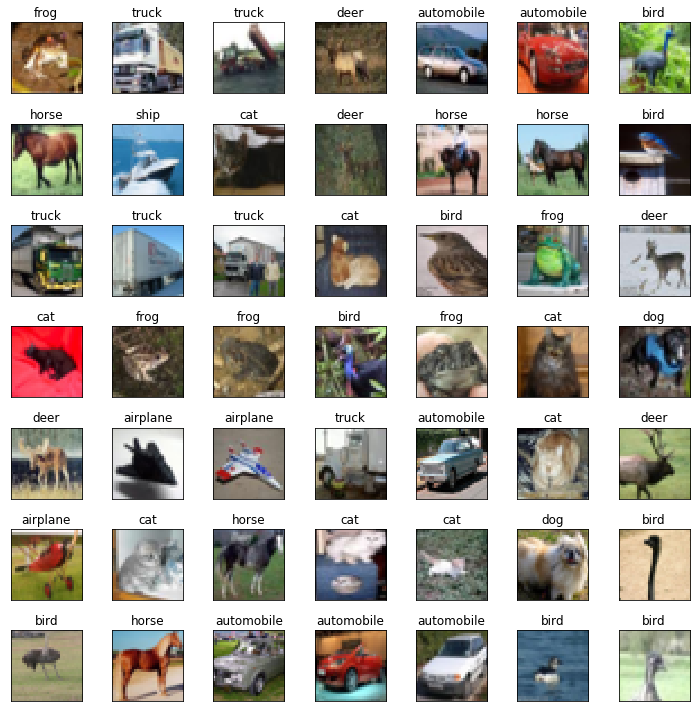

In [3]:
# Visualize MPS realizations from the above training image:
print(f'The number of training data: {x_train.shape[0]} \nThe number of testing data: {x_test.shape[0]}')

# Visualize training images:
c, r = 7, 7
plt.figure(figsize = (10,10))
for i in range(c*r):
    plt.subplot(c,r,i+1)
    fig = plt.imshow(x_train[i])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.title(Name[y_train[i,0]])
plt.tight_layout()

#### Image Channels / Depth

Since these are color images, they actually include 3 channels or image depth of 3

* red, blue and green intensities

* we will start with all three channels

Shape of training image: 32 X 32 X 3 in X, Y, and channels


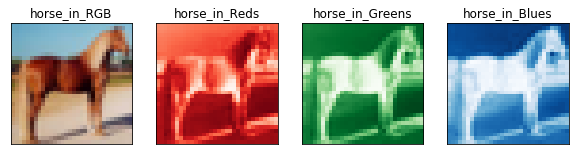

In [18]:
# Please note that each image has thee channels for R, G, and B:
print(f'Shape of training image: {x_train.shape[1]} X {x_train.shape[2]} X {x_train.shape[3]} in X, Y, and channels')

plt.figure(figsize= (10,5))
plt.subplot(1,4,1)
fig = plt.imshow(x_train[43])
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.title(Name[y_train[43,0]]+'_in_RGB')
RGB_name = ['Reds', 'Greens', 'Blues'];

for i in range(3):
    plt.subplot(1,4,i+2)
    fig = plt.imshow(x_train[43,:,:,i],cmap = RGB_name[i])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.title(Name[y_train[43,0]]+'_in_'+RGB_name[i])


#### Step 1. Define convolutional neural networks for Classifier

Now we will define our convolutional neural network

* with keras frontend for tensor flow it is not too dificult to design our network

* the overall architure looks like this:

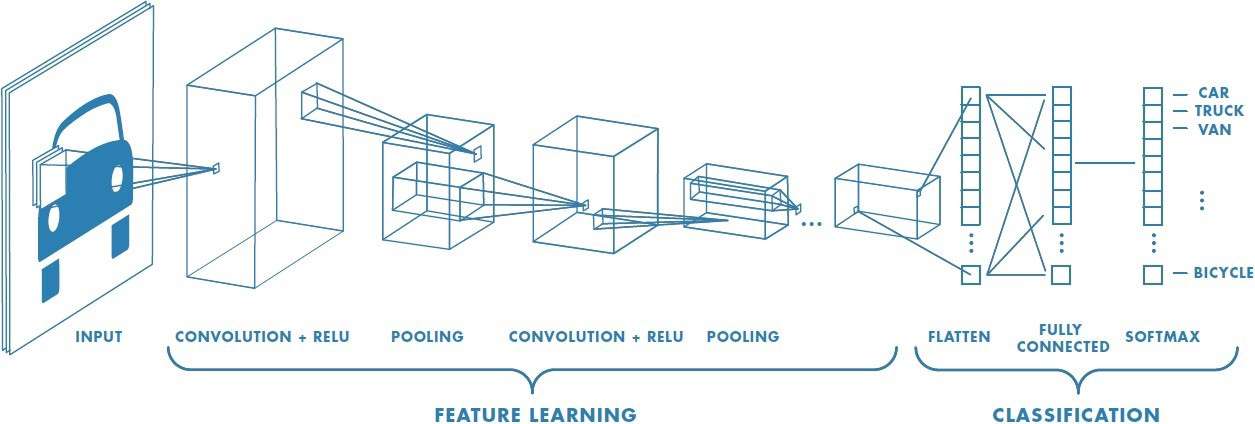

Image taken from [blog post](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)) by Sumit Saha.

We cycle multiple layers of:

* convolution and activation with ReLU and 25% drop out

* max pooling

After multiple cycles we have learning the features in the images we then finish with:

* flattening the feature into a 1D vector

* feed-forward, fully-connected artificial neural network with 8 output nodes for the probability of each category


#### Data Preprocessing

First, we should preprocess our data. 

* as image channels vary from 0 to 255 (i.e., typical RGB image), we will divide them by 255 to rescale from 0 to 1. 

* also as catetories (e.g., y_train and y_test) are non-ordinal categorical variables, we will apply one-hot-encode to make the variable more compatible with a neural network model. 

* should we have ordinal categories (e.g.,'first','second', and 'third'), we can just use categorical number (i.e., integer encode). Following figure presents how one-hot-encode works in our example:  

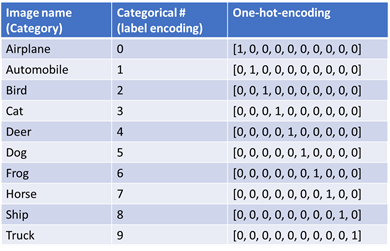

Image by Jason Brownlee, from this [blog post](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/).

To learn more about integer encoding and one-hot-encoding, please refer this lecture on [feature transformations](https://www.youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf).

In [5]:
# Preprocess training data:
from sklearn.preprocessing import OneHotEncoder
x_train_n, x_test_n = x_train / 255, x_test / 255 # to rescale image from 0 to 1
y_train_one_hot, y_test_one_hot = OneHotEncoder().fit_transform(y_train), OneHotEncoder().fit_transform(y_test)

#### Specify the CNN Design

As specified below the model includes:

* 3 cycles of convolution with 3x3 kernels, stride = 2 for dimension reduction, and padding

* feature maps transition from 32x32x3 to 16x16x16 to 8x8x32 to 4x4x32 and then a vector of 512

In [6]:
def CNN_model():
    # define neural network model sequentially
    model = tf.keras.Sequential()
    # Feature map 1: (32x32x3) --> (16x16x16)
    model.add(layers.Conv2D(16, kernel_size=(3,3), strides=2, input_shape=[32,32,3], padding="same"))
    model.add(layers.ReLU())
    model.add(layers.Dropout(0.25))
    # Feature map 2: (16x16x16) --> (8x8x32)
    model.add(layers.Conv2D(32, kernel_size=(3,3), strides=2, padding="same"))
    model.add(layers.ReLU())
    model.add(layers.Dropout(0.25))
    # Feature map 3: (8x8x32) --> (4x4x32)
    model.add(layers.Conv2D(32, kernel_size=(3,3), strides=2, padding="same"))
    model.add(layers.ReLU())
    model.add(layers.Dropout(0.25))
    model.add(layers.Flatten())
    # Output layer: (4x4x64) --> 10 (i.e., each node corresponds to the probability to be each class)
    model.add(layers.Dense(10, activation = 'softmax'))   # <- Softmax is an activation function for classfier
    
    # Compile the Neural Network - define Loss and optimizer to tune the associated weights
    model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer='adam')
    return model

#### Instantiate and Train the Convolutional Neural Network

Now we instantiate the CNN specified above and then train it to the 50,000 images in the training set

* note this took about 5 minutes on my desktop

In [7]:
# Instantiate model
model = CNN_model()
model.summary()

# training the Neural Network and saving metrics every 100 epochs
checkpoint_filepath = 'CNN Classifier Models/CNN_Model'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True)
history = model.fit(x_train_n, y_train_one_hot.todense(), 
                    batch_size=500, epochs=50, verbose=2, 
                    validation_data=(x_test_n, y_test_one_hot.todense()),
                    callbacks=[model_checkpoint_callback])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 16)        448       
_________________________________________________________________
re_lu (ReLU)                 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          9

#### Visualize the Model Performance in Training and Testing

Let's visualize the training and testing accuracy over the Epochs of training

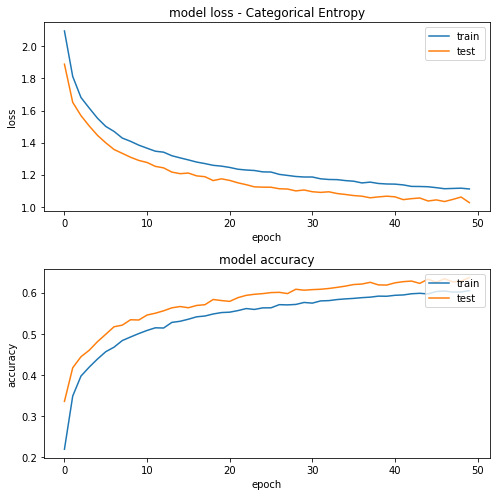

In [8]:
plt.figure(figsize = (7,7))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss - Categorical Entropy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.subplot(2,1,2)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

#### Deeper Convolutional Neural Network

The above CNN model only has ~60% accuracy in predicting CIFAR-10 images' categories. 

Let's try to improve this result with a "deeper" CNN model. We keep the 3 convolutional layers, but we:

* we double the number of convolutional kernels to increase the feature map depth

* add 4 hidden layers to the feed-forward, fully-connected neural network

In [9]:
def CNN_model_deeper():
    # define convolutional neural network model sequentially
    model = tf.keras.Sequential()
    # Feature map 1: (32x32x3) --> (16x16x64)
    model.add(layers.Conv2D(32, kernel_size=(3,3), strides=2, input_shape=[32,32,3], padding="same"))
    model.add(layers.ReLU())
    model.add(layers.Dropout(0.25))
    
    # Feature map 2: (16x16x64) --> (8x8x128)
    model.add(layers.Conv2D(64, kernel_size=(3,3), strides=2, padding="same"))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.ReLU())
    model.add(layers.Dropout(0.25))
    
    # Feature map 3: (8x8x128) --> (4x4x256)
    model.add(layers.Conv2D(128, kernel_size=(3,3), strides=2, padding="same"))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.ReLU())
    model.add(layers.Dropout(0.25))
    model.add(layers.Flatten())

    # Hidden layer 1: (4x4x256) --> 1024
    model.add(layers.Dense(512))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.ReLU())
    model.add(layers.Dropout(0.25))
    
    # Hidden layer 2: 1024 --> 512
    model.add(layers.Dense(256))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.ReLU())
    model.add(layers.Dropout(0.25))

    # Hidden layer 3: 512 --> 256
    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.ReLU())
    model.add(layers.Dropout(0.25))
    
    # Hidden layer 4: 256 --> 128
    model.add(layers.Dense(64))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.ReLU())
    model.add(layers.Dropout(0.25))   
    
    # Output layer: 128 --> 10
    model.add(layers.Dense(10, activation = 'softmax'))   # <- Softmax is an activation function for classfier
    
    # Compile the Neural Network - define Loss and optimizer to tune the associated weights
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
    model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer=optimizer)
    return model

#### Instantiate and Train the Deeper Convolutional Neural Network

Once again, we instantiate the CNN specified above and then train it to the 50,000 images in the training set

* note this took about 10 minutes on my desktop

In [19]:
# Instantiate model
model_deep = CNN_model_deeper()
# model_deep.summary()


# training the Convolutional Neural Network and saving metrics every 100 epochs
checkpoint_filepath = 'CNN Classifier Models/CNN_Deep_Model'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True)
history_deep = model_deep.fit(x_train_n, y_train_one_hot.todense(), 
                    batch_size=100, epochs=50, verbose=2, 
                    validation_data=(x_test_n, y_test_one_hot.todense()),
                    callbacks=[model_checkpoint_callback])

Epoch 1/50
500/500 - 13s - loss: 2.2551 - categorical_accuracy: 0.1928 - val_loss: 1.9254 - val_categorical_accuracy: 0.2993
Epoch 2/50
500/500 - 13s - loss: 1.8940 - categorical_accuracy: 0.3041 - val_loss: 1.6431 - val_categorical_accuracy: 0.3934
Epoch 3/50
500/500 - 13s - loss: 1.7020 - categorical_accuracy: 0.3767 - val_loss: 1.4866 - val_categorical_accuracy: 0.4588
Epoch 4/50
500/500 - 13s - loss: 1.5746 - categorical_accuracy: 0.4284 - val_loss: 1.3570 - val_categorical_accuracy: 0.5012
Epoch 5/50
500/500 - 13s - loss: 1.4793 - categorical_accuracy: 0.4651 - val_loss: 1.2884 - val_categorical_accuracy: 0.5319
Epoch 6/50
500/500 - 13s - loss: 1.4069 - categorical_accuracy: 0.4939 - val_loss: 1.2198 - val_categorical_accuracy: 0.5616
Epoch 7/50
500/500 - 13s - loss: 1.3435 - categorical_accuracy: 0.5190 - val_loss: 1.2113 - val_categorical_accuracy: 0.5641
Epoch 8/50
500/500 - 13s - loss: 1.2935 - categorical_accuracy: 0.5395 - val_loss: 1.1246 - val_categorical_accuracy: 0.6000


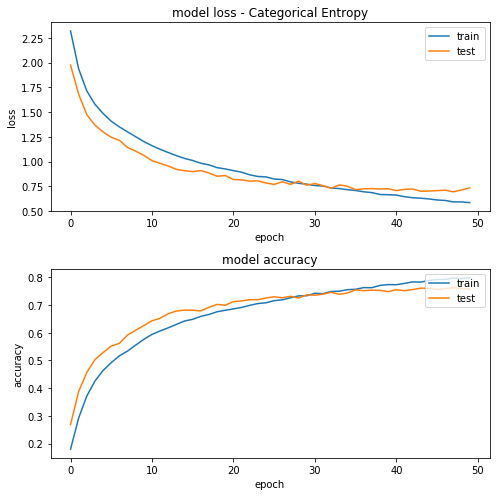

In [11]:
plt.figure(figsize = (7,7))
plt.subplot(2,1,1)
plt.plot(history_deep.history['loss'])
plt.plot(history_deep.history['val_loss'])
plt.title('model loss - Categorical Entropy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.subplot(2,1,2)
plt.plot(history_deep.history['categorical_accuracy'])
plt.plot(history_deep.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

#### Step 2. Predict with theTrained Convolutional Neural Network

Now we load the trained deeper CNN classifier and visualize its prediction performance

* we predict over the training and testing image datasets

* we predict with the category assigned the maximum probability by our model

In [12]:
# Load best CNN model
model_deep.load_weights(checkpoint_filepath)                    # load the trained deeper CNN

In [13]:
# Predict class using the trained model
y_train_predict = model_deep.predict(x_train_n)                 # predict over the training images
y_train_predict = np.argmax(y_train_predict,axis = 1)           # assign the maximum probability category

y_test_predict = model_deep.predict(x_test_n)                   # predict over the testing images 
y_test_predict = np.argmax(y_test_predict,axis = 1)             # assign the maximum probability category

#### Visualize the Truth and Predicted Labels Over Testing Images

Now let's visualize 25 images from our testing image dataset with the truth and predicted categories

* we highlight the incorrect cases

* note the ambiguity in the misclassification cases, we interpret the cause of the incorrect label

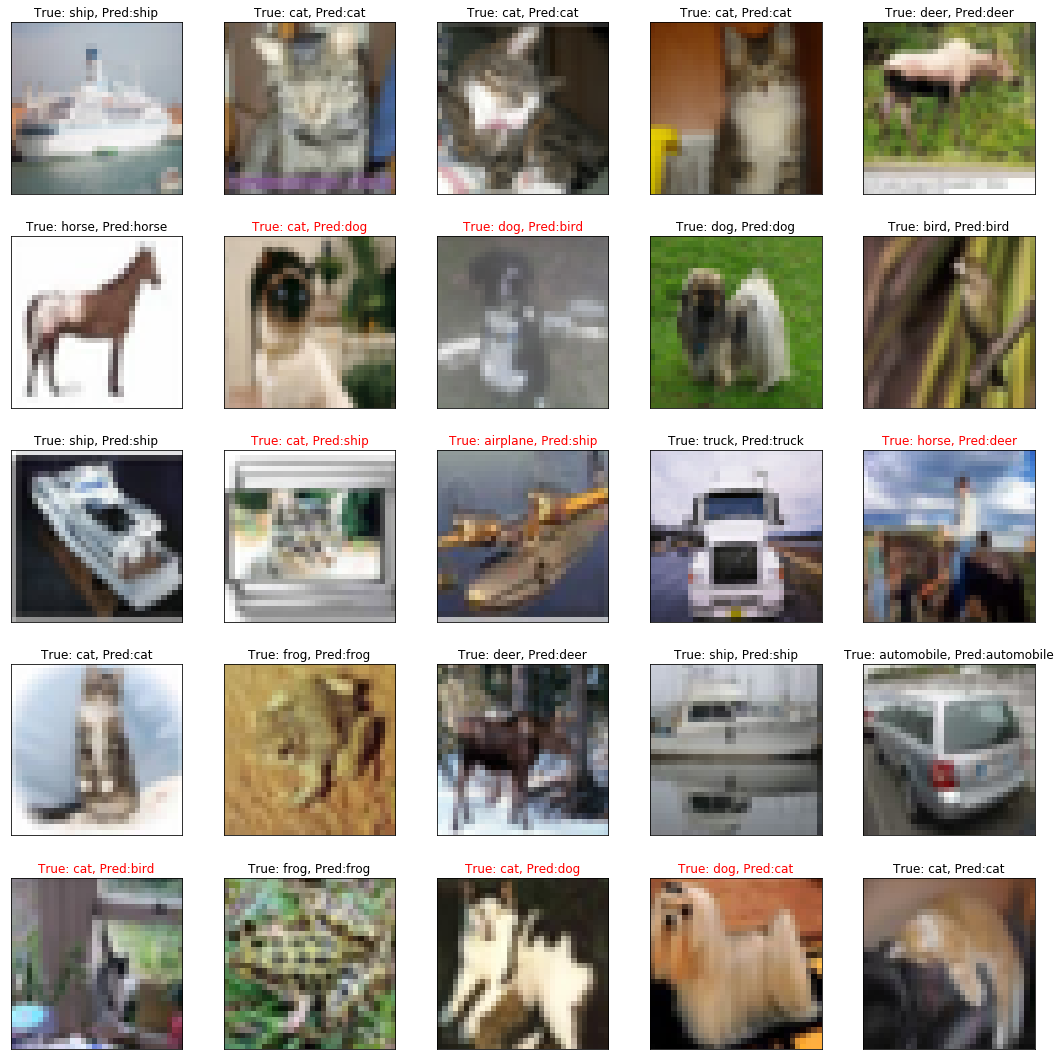

In [14]:
# Visualize testing images:
c, r = 5, 5
plt.figure(figsize = (15,15))
rand_ind = np.random.choice(x_test.shape[0],c*r)
for i, j in enumerate(rand_ind):
    plt.subplot(c,r,i+1)
    fig = plt.imshow(x_test[j])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    if Name[y_test[j,0]] == Name[y_test_predict[j]]:
        plt.title(f'True: {Name[y_test[j,0]]}, Pred:{Name[y_test_predict[j]]}')
    else:
        plt.title(f'True: {Name[y_test[j,0]]}, Pred:{Name[y_test_predict[j]]}', color = 'r')

plt.tight_layout()

#### Calculate Metrics for Model Performance

Since we have a classification problem we use the following metrics

* **precision** - true positives over all positives

* **recall** - true positives over all cases of the category

* **f1 score** - harmonic average of accuracy and recall for greater weight on the lowest score

In [15]:
# Compute metrics for CNN model performance:
print(f'precision: {accuracy_score(y_train.flatten(), y_train_predict):.4f} (for train data), {accuracy_score(y_test.flatten(), y_test_predict):.4f} (for test data)')
print(f'recall: {recall_score(y_train.flatten(), y_train_predict, average = "weighted"):.4f}(for train data), {recall_score(y_test.flatten(), y_test_predict, average = "weighted"):.4f}(for test data)')
print(f'f1 score: {f1_score(y_train.flatten(), y_train_predict, average = "weighted"):.4f}(for train data), {f1_score(y_test.flatten(), y_test_predict, average = "weighted"):.4f}(for test data)')

accuracy: 0.9162 (for train data), 0.7631 (for test data)
recall: 0.9162(for train data), 0.7631(for test data)
f1 score: 0.9159(for train data), 0.7615(for test data)


#### Confusion Matrix

We plot the confusion matrix for the predictions over the testing images

* frequency table with the predicted vs. truth categories

We can observed the common misclassifications.

* e.g. dogs are misclassified as cats 180 times

Text(69.0, 0.5, 'True label')

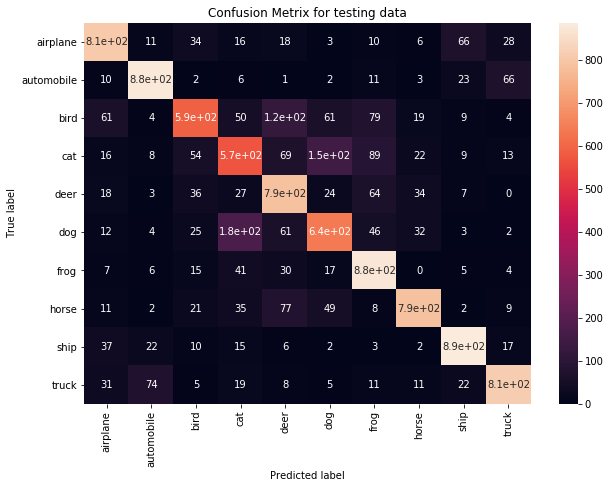

In [16]:
# Plot Confusion Matrix
confusion_matrix = np.zeros((10,10))
for i in range(y_test.shape[0]):
    estimate = y_test_predict[i]
    actual  = y_test[i,0]
    confusion_matrix[actual,estimate] += 1
    
# Plot Confusion Matrix
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in Name], columns = [i for i in Name])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.title("Confusion Metrix for testing data")
plt.xlabel('Predicted label')
plt.ylabel('True label')


The above confusion matrix indicates that:

* distinguishing cat images from dog images are more challenging for the rest of the categories. 

* often our model is confused between bird and deer. 

How can we improve our CNN classifier more? Here are some [benchmark models](https://paperswithcode.com/sota/image-classification-on-cifar-10) 

* note that they didn't split training/testing data as in our demonstration

#### Comments

The Texas Center for Data Analytics and Geostatistics has many other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available [here](https://github.com/GeostatsGuy/PythonNumericalDemos), along with a package for geostatistics in Python called [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 
  
We hope this was helpful,

*Honggeun* and *Michael*

***

#### More on Michael Pyrcz and the Texas Center for Data Analytics and Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
